In [1]:
from app.helper import LocalCache
%reload_ext autoreload
%autoreload 2

from bot.vis import TaskProgress
from bot import TestAlgorithm
from app.config import RunConfig


from concurrent.futures import ThreadPoolExecutor, as_completed

LocalCache.clear()

TICKER = 'RNFT'

test_configs = [
    (RunConfig(
        ticker=TICKER,
        step_max_cnt=max_shares,
        step_base_cnt=base_shares,
        step_lots=2,

        majority_trade=True,
        pretest_period=pretest_period,
        pretest_type=pretest_type,

        threshold_buy_steps=threshold_b_n,
        threshold_sell_steps=threshold_s_n,
        stop_up_p=stop_up_p,
        stop_down_p=stop_down_p,
        step_size_shift=step_size_shift,

        step_size=step_size,
        step_set_orders_cnt=step_cnt,
    ))
    for max_shares in [3, 4, 5]
    for base_shares in [0]
    for threshold_b_n in [0]
    for threshold_s_n in [0]
    for step_size in [0.8, 1, 1.2, 1.4, 1.6]
    for step_cnt in [3]
    for pretest_period in [0]
    for pretest_type in [RunConfig.PRETEST_NONE]
    for step_size_shift in [0.1, 0.2, 0.3, 0.4]
    # for pretest_period in [13]
    # for pretest_type in [RunConfig.PRETEST_RSI]
    for stop_up_p in [0]
    for stop_down_p in [0]
    # for max_shares in [4, 5]
    # for base_shares in [0]
    # for threshold_b_n in [0, max_shares+1]
    # for threshold_s_n in [0, max_shares+1]
    # for step_size in [0.8, 1, 1.2, 1.4]
    # for step_size_shift in [0, 0.25, 0.5]
    # for step_cnt in [2]
    # for pretest_period in [13]
    # for stop_up_p in [0]
    # for stop_down_p in [0]
]


def run_test(config: RunConfig):
    test_alg = TestAlgorithm(do_printing=False, config=config)
    return test_alg.test(
        last_test_date='2024-06-30',
        test_days_num=30,  # 365,
        shares_count=0,
    )

results = []
progress = TaskProgress(len(test_configs))

with ThreadPoolExecutor(max_workers=4) as executor:
    future_to_params = {executor.submit(run_test, config): config for config in test_configs}
    
    for future in as_completed(future_to_params):
        params = future_to_params[future]
        res = future.result()
        if res:
            results.append(res)
        progress.update_progress()

# Вывод результатов или их дальнейшая обработка
sorted_results = sorted(results, key=lambda x: float(x['profit_p']), reverse=True)

print()
for item in sorted_results:
    print(item)

Запуск в 03:11
Закончено в 03:12, количество 60, длительность 0:00:52                                              

{'profit': 53.5, 'profit_p': 1.42, 'profit_p_avg': 0.05, 'config': RNFT+ 4/0/3 x l2 x 0.8(+x0.4)¤ , 'op': 894}
{'profit': 39.3, 'profit_p': 1.39, 'profit_p_avg': 0.05, 'config': RNFT+ 3/0/3 x l2 x 0.8(+x0.4)¤ , 'op': 841}
{'profit': 53.5, 'profit_p': 1.13, 'profit_p_avg': 0.04, 'config': RNFT+ 5/0/3 x l2 x 0.8(+x0.4)¤ , 'op': 894}
{'profit': 14.9, 'profit_p': 0.32, 'profit_p_avg': 0.01, 'config': RNFT+ 5/0/3 x l2 x 0.8(+x0.2)¤ , 'op': 962}
{'profit': 11.1, 'profit_p': 0.29, 'profit_p_avg': 0.01, 'config': RNFT+ 4/0/3 x l2 x 0.8(+x0.2)¤ , 'op': 950}
{'profit': 4.4, 'profit_p': 0.16, 'profit_p_avg': 0.01, 'config': RNFT+ 3/0/3 x l2 x 1.6(+x0.2)¤ , 'op': 244}
{'profit': 5.9, 'profit_p': 0.16, 'profit_p_avg': 0.01, 'config': RNFT+ 4/0/3 x l2 x 1.2(+x0.2)¤ , 'op': 422}
{'profit': 6.3, 'profit_p': 0.13, 'profit_p_avg': 0.0, 'config': RNFT+ 5/0/3 x l2 x 1.2(+x0.2)¤ , 'op': 425}


zero 1
{'profit': -19.9, 'profit_p': -0.53, 'profit_p_avg': -0.02, 'config': RNFT+ 4/0/3 x l2 x 1.4(+x0.5)¤ , 'op': 278}
{'profit': -20.1, 'profit_p': -0.53, 'profit_p_avg': -0.02, 'config': RNFT+ 4/0/3 x l2 x 1.4(+x0.25)¤ , 'op': 298}
{'profit': -19.9, 'profit_p': -0.7, 'profit_p_avg': -0.02, 'config': RNFT+ 3/0/3 x l2 x 1.4(+x0.5)¤ , 'op': 278}
{'profit': -28.7, 'profit_p': -1.01, 'profit_p_avg': -0.03, 'config': RNFT+ 3/0/3 x l2 x 1.4(+x0.25)¤ , 'op': 292}

zero 0
{'profit': -19.9, 'profit_p': -0.53, 'profit_p_avg': -0.02, 'config': RNFT+ 4/0/3 x l2 x 1.4(+x0.5)¤ , 'op': 278}
{'profit': -20.1, 'profit_p': -0.53, 'profit_p_avg': -0.02, 'config': RNFT+ 4/0/3 x l2 x 1.4(+x0.25)¤ , 'op': 298}
{'profit': -19.9, 'profit_p': -0.7, 'profit_p_avg': -0.02, 'config': RNFT+ 3/0/3 x l2 x 1.4(+x0.5)¤ , 'op': 278}
{'profit': -28.7, 'profit_p': -1.01, 'profit_p_avg': -0.03, 'config': RNFT+ 3/0/3 x l2 x 1.4(+x0.25)¤ , 'op': 292}

In [2]:
# Поля, которые нужно исключить
fields = [
    'config',
    # 'days',
    # 'sleep_trading',
    # 'step_cnt',
#     'profit_avg',
#     'profit',
#     'pot_profit_p',
]

# Отфильтровываем данные, исключая указанные поля
filtered_data = [
    {key: item[key] for key in item if key not in fields}
    for item in sorted_results
]


In [3]:
# Поля, которые нужно исключить
exclude_fields = [
    'config',
    # 'days',
    # 'sleep_trading',
    # 'step_cnt',
#     'profit_avg',
#     'profit',
#     'pot_profit_p',
]

config_fields = [
    'step_max_cnt',
    'step_base_cnt',
    'step_size',
    'step_set_orders_cnt',
    'step_lots',
    'step_size_shift',
]

filtered_data = []
for item in sorted_results:
    item_row = {}
    config = item['config']
    
    for key in item:
        if key not in exclude_fields:
            item_row[key] = item[key]
    
    for key in config_fields:
        item_row['c_' + key] = getattr(config, key)
    
    filtered_data.append(item_row)
    
    
    

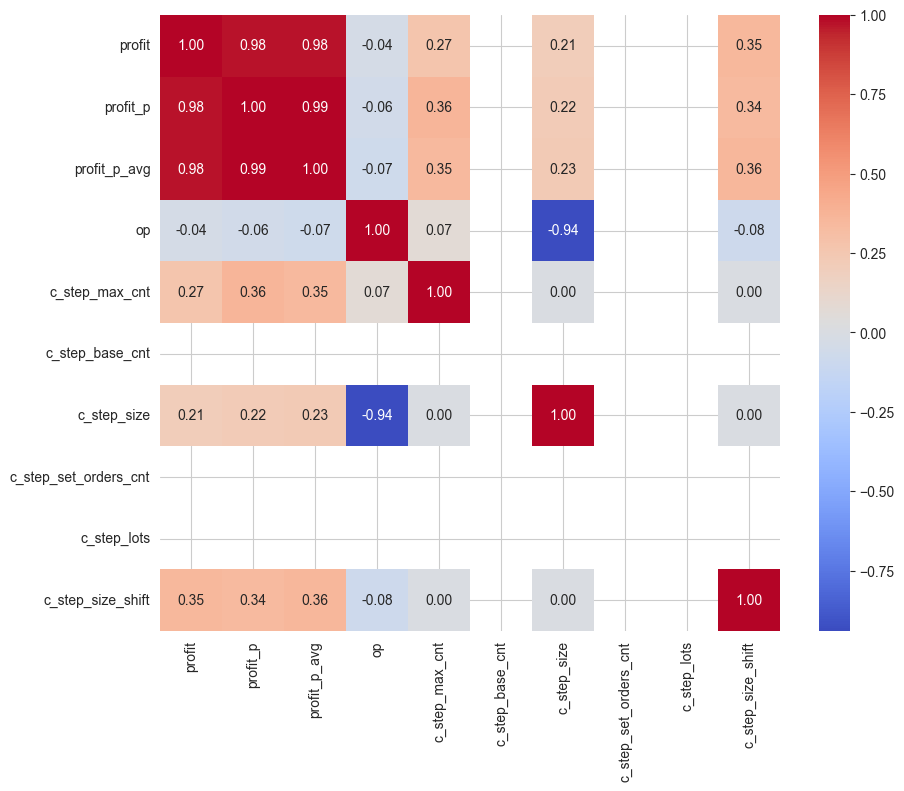

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = sorted_results
data = filtered_data

df = pd.DataFrame(data)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()